In [428]:
import json
import numpy as np
import pandas as pd

train = "C:/Users/we19383/OneDrive - University of Bristol/Desktop/Foundation Year/COMSM0023_2023_TB1-Dialogue_and_Narrative/data_post-competition/data_post-competition/MD-Agreement_dataset./MD-Agreement_train.json"
test = "C:/Users/we19383/OneDrive - University of Bristol/Desktop/Foundation Year/COMSM0023_2023_TB1-Dialogue_and_Narrative/data_post-competition/data_post-competition/MD-Agreement_dataset./MD-Agreement_test.json"
dev = "C:/Users/we19383/OneDrive - University of Bristol/Desktop/Foundation Year/COMSM0023_2023_TB1-Dialogue_and_Narrative/data_post-competition/data_post-competition/MD-Agreement_dataset./MD-Agreement_dev.json"


def load_dataset(train, test, dev):
    """This function loads, the training, testing and development set based
    on the alterations made to the directory variable dir"""
    
    with open(train) as f:
        train_set = json.load(f)
        print(f"The training set has {len(train_set)} instances")
    with open(test) as g:
        test_set = json.load(g)
        print(f"The testing set has {len(test_set)} instances")
    with open(dev) as h:
        dev_set = json.load(h)
        print(f"The development set has {len(dev_set)} instances")
        
    return train_set, test_set, dev_set

train_set, test_set, dev_set = load_dataset(train=train, test=test, dev=dev)

The training set has 6592 instances
The testing set has 3057 instances
The development set has 1104 instances


The (tentatively) useful metrics of interest from the dataset, for classification are 'text', 'annotators', 'annotations', 'hard labels' and 'soft labels'. So it's necessary to make lists of these from the training set before going through the bag-of-words implementation.

In [429]:
train_array = np.array(list(train_set.values()))
test_array = np.array(list(test_set.values()))
dev_array = np.array(list(dev_set.values()))

print(train_array)

[{'text': '<user> <user> No way Jose!!', 'annotation task': 'offensiveness detection', 'number of annotations': 5, 'annotations': '0,0,0,0,0', 'annotators': 'Ann418,Ann266,Ann149,Ann730,Ann345', 'lang': 'en', 'hard_label': '0', 'soft_label': {'0': 1.0, '1': 0.0}, 'split': 'train', 'other_info': {'domain': 'Elections2020'}}
 {'text': 'Good god, what is the matter with people ?', 'annotation task': 'offensiveness detection', 'number of annotations': 5, 'annotations': '0,0,0,0,0', 'annotators': 'Ann733,Ann422,Ann779,Ann514,Ann777', 'lang': 'en', 'hard_label': '0', 'soft_label': {'0': 1.0, '1': 0.0}, 'split': 'train', 'other_info': {'domain': 'Covid-19'}}
 {'text': '<user> <user> <user> <user> Um the Kurds are helping the ppl Of the Ukraine stop Putin/Russian military from overthrowing the Ukrainian government. Trump Endangered the lives of many by cutting US aid in an effort to extort the Ukrainian president for help winning the election Which led to his impeachment .', 'annotation task':

In [430]:
tweet = []
hard_label = []

for i in range(len(train_array)):
    tweet.append(train_array[i]['text'])
    hard_label.append(train_array[i]['hard_label'])


tweet_pred = []
hard_label_pred = []

for i in range(len(test_array)):
    tweet_pred.append(test_array[i]['text'])
    hard_label_pred.append(test_array[i]['hard_label'])
        

In [431]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(tweet)
X_train = vectorizer.transform(tweet)
X_test = vectorizer.transform(tweet_pred)

vocab = vectorizer.vocabulary_

In [432]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(force_alpha=True)
clf.fit(X_train, hard_label)

MultinomialNB(force_alpha=True)

In [433]:
prediction = clf.predict(X_test)
prediction = pd.DataFrame(prediction)
print(prediction)

      0
0     0
1     0
2     1
3     0
4     1
...  ..
3052  1
3053  1
3054  0
3055  0
3056  0

[3057 rows x 1 columns]


In [434]:
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score

y_true = hard_label_pred
y_pred = prediction

accuracy = metrics.accuracy_score(y_true,y_pred)
print(f"This is accuracy: {accuracy}")

precision = metrics.precision_score(y_true, y_pred, average = None)
print(f"This is precision: {precision}")

recall = metrics.recall_score(y_true, y_pred, average = None)
print(f"This is recall: {recall}")

F1 = metrics.f1_score(y_true,y_pred, average = None)
print(f"This is F1 score: {F1}")

print(cohen_kappa_score(y_true, y_pred))

This is accuracy: 0.7386326463853451
This is precision: [0.75223759 0.68280467]
This is recall: [0.90681707 0.40176817]
This is F1 score: [0.822326   0.50587508]
0.34403810285999714


The next model to be tried will be logistic regression. The metrics will be generated 

In [435]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X = X_train
y = hard_label

clf2 = LogisticRegression(random_state=0, max_iter=13000).fit(X, y)

prediction2 = clf2.predict(X_test)
prob_pred = clf.predict_proba(X)

In [436]:
accuracy2 = metrics.accuracy_score(y_true, prediction2)
print("This is accuracy:",  accuracy2)

precision2 = metrics.precision_score(y_true, prediction2, average = None)
print("This is precision:", precision2)

recall2 = metrics.recall_score(y_true, prediction2, average = None)
print("This is recall:", recall2)

F1_2 = metrics.f1_score(y_true, prediction2, average = None)
print("This is F1 score:", F1_2)

print(cohen_kappa_score(y_true, prediction2))

This is accuracy: 0.7566241413150148
This is precision: [0.77969762 0.68463612]
This is recall: [0.88523786 0.49901768]
This is F1 score: [0.82912265 0.57727273]
0.4122381388502402


Using a basic neural network classifier on the data before using some kind of metric to model disagreement

In [437]:
tr_df = pd.DataFrame(train_set).transpose()
te_df = pd.DataFrame(test_set).transpose()

cdf = pd.concat([tr_df, te_df])
print(cdf.head())

                                                text          annotation task  \
1                        <user> <user> No way Jose!!  offensiveness detection   
2         Good god, what is the matter with people ?  offensiveness detection   
3  <user> <user> <user> <user> Um the Kurds are h...  offensiveness detection   
4                   What is WRONG with these people?  offensiveness detection   
5  <user> This earpiece too plus a wire on his sl...  offensiveness detection   

  number of annotations annotations                          annotators lang  \
1                     5   0,0,0,0,0  Ann418,Ann266,Ann149,Ann730,Ann345   en   
2                     5   0,0,0,0,0  Ann733,Ann422,Ann779,Ann514,Ann777   en   
3                     5   0,0,0,0,1  Ann425,Ann511,Ann779,Ann420,Ann721   en   
4                     5   0,0,0,0,0  Ann632,Ann179,Ann701,Ann201,Ann661   en   
5                     5   1,0,0,0,0  Ann266,Ann168,Ann149,Ann381,Ann774   en   

  hard_label            soft_lab

In [438]:
import pandas as pd
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam


train_df, test_df = train_test_split(cdf, test_size=0.3, random_state=42)

# Tokenize the text using the same tokenizer for both training and testing sets
max_words = 14000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['text'])

train_sequences = tokenizer.texts_to_sequences(train_df['text'])
test_sequences = tokenizer.texts_to_sequences(test_df['text'])

# Pad sequences
max_sequence_length = 100
train_padded = pad_sequences(train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# Convert labels to float32
train_labels = train_df['hard_label'].astype('float32')
test_labels = test_df['hard_label'].astype('float32')

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=16, input_length=max_sequence_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='softmax'),
    tf.keras.layers.Dense(16, activation='softmax'),
    tf.keras.layers.Dense(8, activation='softmax'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification, so using sigmoid activation
])

learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer , loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_padded, train_labels, epochs=10, validation_split=0.3)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_padded, test_labels)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/10
148/148 [==============================] - 1s 4ms/step - loss: 0.6412 - accuracy: 0.6928 - val_loss: 0.6301 - val_accuracy: 0.6882
Epoch 2/10
148/148 [==============================] - 0s 3ms/step - loss: 0.6223 - accuracy: 0.6928 - val_loss: 0.6222 - val_accuracy: 0.6882
Epoch 3/10
148/148 [==============================] - 0s 3ms/step - loss: 0.6177 - accuracy: 0.6928 - val_loss: 0.6202 - val_accuracy: 0.6882
Epoch 4/10
148/148 [==============================] - 1s 4ms/step - loss: 0.6155 - accuracy: 0.6928 - val_loss: 0.6178 - val_accuracy: 0.6882
Epoch 5/10
148/148 [==============================] - 0s 3ms/step - loss: 0.6056 - accuracy: 0.6928 - val_loss: 0.6089 - val_accuracy: 0.6882
Epoch 6/10
148/148 [==============================] - 1s 3ms/step - loss: 0.5615 - accuracy: 0.6928 - val_loss: 0.5825 - val_accuracy: 0.6882
Epoch 7/10
148/148 [==============================] - 1s 3ms/step - loss: 0.4574 - accuracy: 0.7961 - val_loss: 0.5610 - val_accuracy: 0.7336
Epoch 

91/91 [==============================] - 0s 2ms/step
Confusion Matrix:
[[1591  408]
 [ 421  475]]


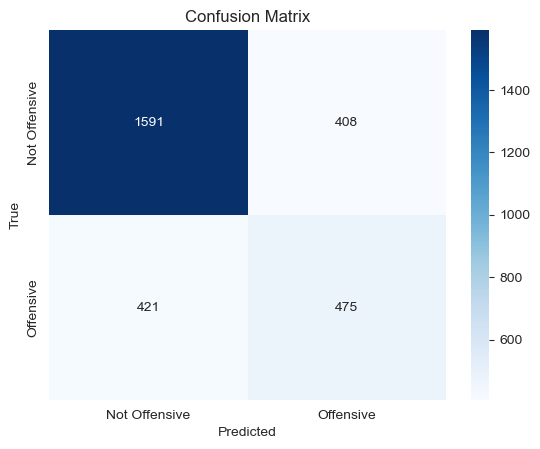


Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.80      0.79      1999
         1.0       0.54      0.53      0.53       896

    accuracy                           0.71      2895
   macro avg       0.66      0.66      0.66      2895
weighted avg       0.71      0.71      0.71      2895


In [439]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = model.predict(test_padded)

# Convert probability predictions to binary predictions
binary_predictions = (predictions > 0.5).astype(int)

# Generate the confusion matrix
cm = confusion_matrix(test_labels, binary_predictions)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
# Display the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Offensive', 'Offensive'], yticklabels=['Not Offensive', 'Offensive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
print("\nClassification Report:")
print(classification_report(test_labels, binary_predictions))


To model agreement, there are a few different metrics we can use: Cohen's Kappa for categorical annotations, Interclass Correlation Coefficient (ICC) for continuous annotations e.g. soft labels in this case and Fleiss' Kappa which extends Cohen's Kappa for more than two. First I'll use Cohen's Kappa and then extend to multi-class classification, using either ICC or Fleiss' Kappa 

In [440]:
from sklearn.metrics import cohen_kappa_score

# Make predictions on the test set
predictions = model.predict(test_padded)
binary_predictions = (predictions > 0.5).astype(int)

# Calculate the agreement metric (Cohen's Kappa)
agreement_score = cohen_kappa_score(test_labels, binary_predictions)
precision_bin = metrics.precision_score(test_labels, binary_predictions, average=None)
recall_bin = metrics.recall_score(test_labels, binary_predictions, average=None)
print("Cohen's Kappa:", agreement_score)
print("Precision:", precision_bin)
print("Recall:", recall_bin)

91/91 [==============================] - 0s 2ms/step
Cohen's Kappa: 0.32734217539937704
Precision: [0.79075547 0.53793884]
Recall: [0.79589795 0.53013393]
